In [2]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
from __future__ import print_function

import keras
from keras import metrics
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop, SGD
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from keras.models import model_from_json
from keras.callbacks import EarlyStopping
from sklearn.utils import class_weight

from sklearn.metrics import confusion_matrix, precision_score, recall_score, log_loss, f1_score

Using TensorFlow backend.


In [4]:
fracture_data_1 = loadmat('fracture_sample.mat')['frac1']
fracture_data_2 = loadmat('fracture_sample.mat')['frac2']
fracture_data_01 = loadmat('fracture_sample.mat')['nonfrac1']
fracture_data_02 = loadmat('fracture_sample.mat')['nonfrac2']

In [5]:
#predicted_data = np.array(fracture_data > 0, dtype = int)
predicted_data_1 = loadmat('fracture_sample.mat')['frac1_binary']
predicted_data_2 = loadmat('fracture_sample.mat')['frac2_binary']
predicted_data_01 = np.zeros(fracture_data_01.shape)
predicted_data_02 = np.zeros(fracture_data_02.shape)

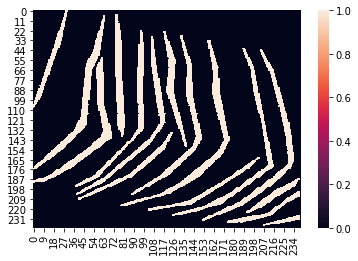

In [6]:
predicted_data_02.shape
sns.heatmap(predicted_data_1)

In [7]:
# 3D Convolutional
fracture_data_1 = np.pad(fracture_data_1, ((1, 1), (1, 1)), 'constant', 
                constant_values=((0, 0), (0, 0)))
predicted_data_1 = np.pad(predicted_data_1, ((1, 1), (1, 1)), 'constant', 
                constant_values=((0, 0), (0, 0)))
fracture_data_2 = np.pad(fracture_data_2, ((1, 1), (1, 1)), 'constant', 
                constant_values=((0, 0), (0, 0)))
predicted_data_2 = np.pad(predicted_data_2, ((1, 1), (1, 1)), 'constant', 
                constant_values=((0, 0), (0, 0)))
fracture_data_01 = np.pad(fracture_data_01, ((1, 1), (1, 1)), 'constant', 
                constant_values=((0, 0), (0, 0)))
predicted_data_01 = np.pad(predicted_data_01, ((1, 1), (1, 1)), 'constant', 
                constant_values=((0, 0), (0, 0)))
fracture_data_02 = np.pad(fracture_data_02, ((1, 1), (1, 1)), 'constant', 
                constant_values=((0, 0), (0, 0)))
predicted_data_02 = np.pad(predicted_data_02, ((1, 1), (1, 1)), 'constant', 
                constant_values=((0, 0), (0, 0)))

In [8]:
fracture_data_1 = np.array([fracture_data_1[(y-1):(y+2), (x-1):(x+2)] 
              for x in np.arange(1, fracture_data_1.shape[1] - 1) 
              for y in np.arange(1, fracture_data_1.shape[0] - 1)])

predicted_data_1 = np.array([predicted_data_1[y,x] 
              for x in np.arange(1, predicted_data_1.shape[1] - 1) 
              for y in np.arange(1, predicted_data_1.shape[0] - 1)])

fracture_data_2 = np.array([fracture_data_2[(y-1):(y+2), (x-1):(x+2)] 
              for x in np.arange(1, fracture_data_2.shape[1] - 1) 
              for y in np.arange(1, fracture_data_2.shape[0] - 1)])

predicted_data_2 = np.array([predicted_data_2[y,x] 
              for x in np.arange(1, predicted_data_2.shape[1] - 1) 
              for y in np.arange(1, predicted_data_2.shape[0] - 1)])

fracture_data_01 = np.array([fracture_data_01[(y-1):(y+2), (x-1):(x+2)] 
              for x in np.arange(1, fracture_data_01.shape[1] - 1) 
              for y in np.arange(1, fracture_data_01.shape[0] - 1)])

predicted_data_01 = np.array([predicted_data_01[y,x] 
              for x in np.arange(1, predicted_data_01.shape[1] - 1) 
              for y in np.arange(1, predicted_data_01.shape[0] - 1)])

fracture_data_02 = np.array([fracture_data_02[(y-1):(y+2), (x-1):(x+2)] 
              for x in np.arange(1, fracture_data_02.shape[1] - 1) 
              for y in np.arange(1, fracture_data_02.shape[0] - 1)])

predicted_data_02 = np.array([predicted_data_02[y,x] 
              for x in np.arange(1, predicted_data_02.shape[1] - 1) 
              for y in np.arange(1, predicted_data_02.shape[0] - 1)])

In [9]:
58084/241

241.0124481327801

In [10]:
train_split = int(fracture_data_1.shape[0]/2)
valid_split = int(fracture_data_1.shape[0]*3/4)

fracture_train = np.concatenate((fracture_data_1[:train_split,...],
                           fracture_data_2[:train_split,...],
                           fracture_data_01[:train_split,...],
                           fracture_data_02[:train_split,...]), axis = 0)
fracture_valid = np.concatenate((fracture_data_1[train_split:valid_split,...],
                           fracture_data_2[train_split:valid_split,...],
                           fracture_data_01[train_split:valid_split,...],
                           fracture_data_02[train_split:valid_split,...]), axis = 0)
fracture_test =  np.concatenate((fracture_data_1[valid_split:,...],
                           fracture_data_2[valid_split:,...],
                           fracture_data_01[valid_split:,...],
                           fracture_data_02[valid_split:,...]), axis = 0)

predicted_train = np.concatenate((predicted_data_1[:train_split,...],
                            predicted_data_2[:train_split,...],
                            predicted_data_01[:train_split,...],
                            predicted_data_02[:train_split,...]), axis = 0)
predicted_valid = np.concatenate((predicted_data_1[train_split:valid_split,...],
                            predicted_data_2[train_split:valid_split,...],
                            predicted_data_01[train_split:valid_split,...],
                            predicted_data_02[train_split:valid_split,...]), axis = 0)
predicted_test =  np.concatenate((predicted_data_1[valid_split:,...],
                            predicted_data_2[valid_split:,...],
                            predicted_data_01[valid_split:,...],
                            predicted_data_02[valid_split:,...]), axis = 0)

In [11]:
# Simple Neural Network

train_x = np.stack([fracture_train], axis = 3)
train_y = predicted_train

train_x_mean, train_x_std = np.mean(train_x), np.std(train_x)

train_x = (train_x - train_x_mean) / train_x_std

valid_x = np.stack([fracture_valid], axis = 3)
valid_y = predicted_valid

valid_x = (valid_x - train_x_mean) / train_x_std

test_x = np.stack([fracture_test], axis = 3)
test_y = predicted_test

test_x = (test_x - train_x_mean) / train_x_std

In [12]:
fracture_test.shape

(58084, 3, 3)

In [13]:
batch_size = 16
epochs = 20

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(train_y),
                                                 train_y)

model = Sequential()
    
#model.add(Conv2D(64, kernel_size = (3,3), data_format = 'channels_last',
#                     input_shape = train_x.shape[1:], kernel_initializer = 'random_uniform'))
#model.add(Activation('relu'))

model.add(Flatten(input_shape = train_x.shape[1:]))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer=SGD(),
              metrics=['acc'])

callback = [EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=1,
                              verbose=0, mode='auto')]

history = model.fit(train_x, train_y,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(valid_x, valid_y))#,
                    #callbacks = callback)#,
                    #class_weight=class_weights)

score = model.evaluate(test_x, test_y, verbose=0)
print(score)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 9)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 10        
_________________________________________________________________
dens

In [14]:
test_y_predict = model.predict(test_x)


In [15]:
#test_y_predict = [x[0] for x in test_y_predict]
test_y_predict = np.array(test_y_predict)

In [16]:
test_y[:10]

array([0., 0., 1., 1., 1., 1., 1., 0., 0., 0.])

In [17]:
test_y_predict[:10]

array([[0.33487844],
       [0.3515944 ],
       [0.4907173 ],
       [0.8200215 ],
       [0.8801106 ],
       [0.849552  ],
       [0.7452486 ],
       [0.53214157],
       [0.36654913],
       [0.15056169]], dtype=float32)

In [18]:
test_x.shape

(58084, 3, 3, 1)

In [19]:
confusion_matrix(test_y, (test_y_predict> 0.5))

array([[51532,  1057],
       [ 3317,  2178]])

In [20]:
f1_score(test_y, (test_y_predict > 0.5))

0.49896907216494846

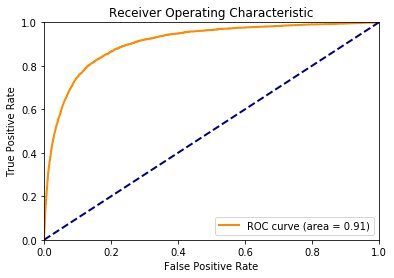

0.9076351488099095


In [21]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score, accuracy_score
fpr, tpr, thresholds = roc_curve(test_y, test_y_predict)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw=lw, linestyle = '--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.show()
print(roc_auc)

In [22]:
test_y_2d = test_y[3:].reshape(241, 241)
test_y_predict_2d = test_y_predict[3:].reshape(241,241)

#test_x_2d = test_x[3:,1,1,0].reshape(241,241)

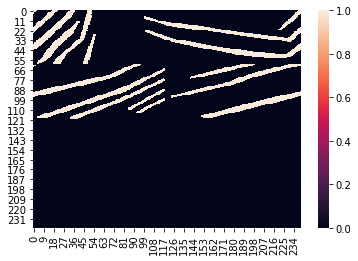

In [23]:
sns.heatmap(test_y_2d)

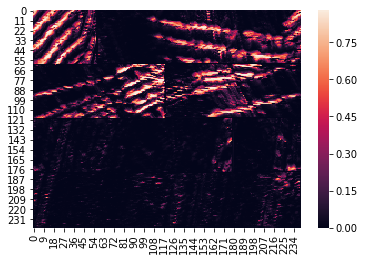

In [24]:
sns.heatmap(test_y_predict_2d)

# Use model 

In [15]:
import h5py
f = h5py.File('moa_125m_2009.mat')
#list(f.keys())
fracture_data_1 = f['MOA2009_125m_mask']

In [16]:
data.shape
#sns.heatmap(data)

(42408, 35208)

In [17]:
#sns.heatmap(fracture_data_1)   #won't work when image is large

fracture_data_1 = np.pad(fracture_data_1, ((1, 1), (1, 1)), 'constant', 
                constant_values=((0, 0), (0, 0)))

fracture_data_1 = np.array([fracture_data_1[(y-1):(y+2), (x-1):(x+2)] 
              for x in np.arange(1, fracture_data_1.shape[1] - 1) 
              for y in np.arange(1, fracture_data_1.shape[0] - 1)])

train_split = int(fracture_data_1.shape[0]/2)
valid_split = int(fracture_data_1.shape[0]*3/4)

fracture_test =  np.concatenate((fracture_data_1[0:,...],),axis = 0)
test_x = np.stack([fracture_test], axis = 3)
test_x = (test_x - train_x_mean) / train_x_std

y_predict = model.predict(test_x)
y_predict = np.array(y_predict)

OSError: Can't read data (wrong B-tree signature)

(58081,)

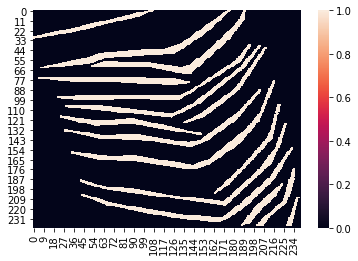

In [67]:
predicted_data_1 = loadmat('fracture_sample.mat')['frac1_binary']
predicted_data_1 = np.pad(predicted_data_1, ((1, 1), (1, 1)), 'constant', 
                constant_values=((0, 0), (0, 0)))
predicted_data_1 = np.array([predicted_data_1[y,x] 
              for x in np.arange(1, predicted_data_1.shape[1] - 1) 
              for y in np.arange(1, predicted_data_1.shape[0] - 1)])
predicted_test =  predicted_data_1[0:,...]

predict_2d = predicted_test[0:].reshape(241,241) #regression result
sns.heatmap(predict_2d)

predicted_test.shape

In [84]:
y_predict_2d = y_predict[0:].reshape(5301,4401) #regression result

import scipy.io as sio
# Create a dictionary
dict = {}
dict['y_predict_2d'] = y_predict_2d
sio.savemat('testmat.mat', dict)

In [71]:
print(test_x.shape)
print(y_predict.shape)

(23329701, 3, 3, 1)
(23329701, 1)


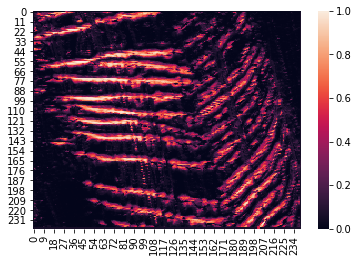

In [69]:
y_predict_2d = y_predict[0:].reshape(241,241) #regression result
#sns.heatmap(y_predict_2d)

# Linear Regression

In [27]:
train_x_flat = train_x.reshape(train_x.shape[0], 9)
valid_x_flat = valid_x.reshape(valid_x.shape[0], 9)
test_x_flat = test_x.reshape(test_x.shape[0], 9)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
optimal_c = 0.001
loss = 1000

for sub_c in C:
    model = LogisticRegression(C = sub_c).fit(train_x_flat, train_y)
    y_predict = model.predict_proba(valid_x_flat)
    sub_loss = log_loss(valid_y, y_predict)
    if sub_loss < loss:
        loss = sub_loss
        optimal_c = sub_c

model_final = LogisticRegression(C = optimal_c).fit(np.concatenate((train_x_flat, valid_x_flat), axis = 0),
                                                    np.concatenate((train_y, valid_y), axis = 0))
y_predict = model_final.predict_proba(test_x_flat)[:,1]

/home/yao/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yao/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yao/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yao/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yao/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

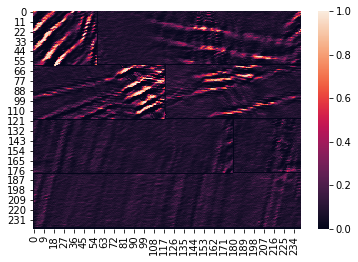

In [35]:
y_predict_2d = y_predict[3:].reshape(241,241) #regression result
sns.heatmap(y_predict_2d)

In [30]:
optimal_c, loss

(1000, 0.3195789465981356)

In [31]:
confusion_matrix(test_y, (y_predict > 0.5))

array([[52308,   281],
       [ 4410,  1085]])

In [32]:
f1_score(test_y, (y_predict > 0.5))

0.3162804255939367